In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# My goal is to predict whether a person survives or not on the Titanic with the given set of features

In [3]:
data = pd.read_csv("train.csv")

<font size="6">DATA ANALYSIS</font>

<font size="3">1.Data Exploring</font>

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Passenger Id column has no use it just provides indexing
data.drop(['PassengerId'],axis=1,inplace=True)

In [7]:
# total no. of missing data in each column
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
# Embarked has only 2 missing data so i have imputed that value with mode of the column
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [9]:
# Combining sibsp and parch to give a new feature the no. of members of a family
data['family'] = data.loc[:,'SibSp'] + data.loc[:,'Parch'] + 1
# i have combined fare and family into a new feature fare per person of a family 
data['fpp'] = data.loc[:,'Fare']/data.loc[:,'family']

In [10]:
# on close inspection we can see that there are certain Titles in the names of people such as Miss master mrs. mr.
# this small peice of code extracts this information from the name column
titles = []
data['Title'] = None
for i in range(0,len(data)):
    l = 0
    r = 0
    s = data.loc[i,'Name']
    for x in range(len(s)):
        if s[x] == ',':
            l = x+2
    for x in range(l,len(s)):
        if s[x] == '.':
            r = x
            break
    data.loc[i,'Title'] = s[l:r]
    x = s[l:r]
    if x not in titles:
        titles.append(x)

In [11]:
# Different titles available in the Name column
titles = pd.DataFrame(titles)
print(titles)

               0
0             Mr
1            Mrs
2           Miss
3         Master
4            Don
5            Rev
6             Dr
7            Mme
8             Ms
9          Major
10          Lady
11           Sir
12          Mlle
13           Col
14          Capt
15  the Countess
16      Jonkheer


In [12]:
# I have replaced Fare with fpp and the required info from the name column has been extracted so its of no use 
data.drop(['Name','Fare'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,family,fpp,Title
0,0,3,male,22.0,1,0,A/5 21171,NaN,S,2,3.62500,Mr
1,1,1,female,38.0,1,0,PC 17599,C85,C,2,35.64165,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,NaN,S,1,7.92500,Miss
3,1,1,female,35.0,1,0,113803,C123,S,2,26.55000,Mrs
4,0,3,male,35.0,0,0,373450,NaN,S,1,8.05000,Mr


In [13]:
# No. of occurences of different titles in the title column
x= data['Title'].value_counts()
print(x)

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64


In [14]:
# let's encode title such that it resembles a uniform distribution based on above set of code
encode = {
    'Mr' : 9,
    'Miss' : 8,
    'Mrs' : 10,
    'Master' : 11,
    'Dr' : 7,
    'Rev' : 12,
    'Mlle' : 6,
    'Major' : 13,
    'Col' : 5,
    'the Countess' : 14,
    'Capt' : 4,
    'Ms' : 15,
    'Sir' : 3,
    'Lady' : 16,
    'Mme' : 2,
    'Don' : 17,
    'Jonkheer' : 1,
    'Dona' : 18,
}
for i in range(len(data)):
    x = data.loc[i,'Title']
    data.loc[i,'Title'] = encode[x]

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Cabin     204 non-null    object 
 8   Embarked  891 non-null    object 
 9   family    891 non-null    int64  
 10  fpp       891 non-null    float64
 11  Title     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
# This peice of code converts numerical strings in Title column to float values
data['Title'] = pd.to_numeric(data['Title'])

<font size="4">2. Data Cleaning</font>

<AxesSubplot:>

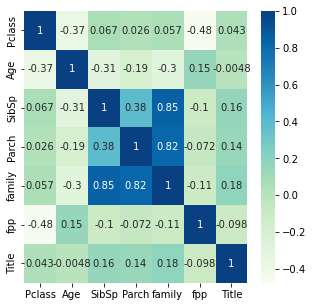

In [17]:
# Heatmap to determine dependence of age column on other columns 
data_age = data.drop(['Cabin','Survived'],axis=1)
data_age.dropna(inplace=True)
plt.figure(figsize=(5,5))
sns.heatmap(data_age.corr(),cmap = "GnBu", annot = True)

In [18]:
#from heatmap we choose Pclass, SibSp and family as columns to find missing values in Age column
cols = ['Pclass','SibSp','family','Age']
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
impute_it = IterativeImputer()
A = impute_it.fit(data[cols])
A = impute_it.transform(data[cols])
A = pd.DataFrame(A)
impute_knn = KNNImputer(n_neighbors=2)
B = impute_knn.fit(data[cols])
B = impute_knn.transform(data[cols])
data.drop(['Age'],axis = 1,inplace=True)
B = pd.DataFrame(B)
data['Age'] = (A.iloc[:,3]+B.iloc[:,3])/2

In [19]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Ticket        0
Cabin       687
Embarked      0
family        0
fpp           0
Title         0
Age           0
dtype: int64

In [20]:
# Only cabin column is left with missing values

In [21]:
# The ticket column has certain tickets which fall under certain similar categories
# This piece of code extracts These features from ticket column
ticket = []
for i in range(len(data)):
    flag = False
    s = data.loc[i,'Ticket']
    j = 0
    while(j<len(s)):
        if(s[j]=='/'):
            flag = True
            break
        j = j+1
    if(flag):
        x = s[0:j]
    else:
        if(len(s)>6):
            x = s[0:2]
        else:
            x = len(s)
    
    if x not in ticket:
            ticket.append(x)
    data.loc[i,'Ticket'] = str(x)

In [22]:
# Encoding Missing values in Cabin as a feature 
for i in range(len(data)):
    if(pd.isnull(data.at[i,'Cabin'])):
        data.loc[i,'Cabin'] = 'M'
    else:
        data.loc[i,'Cabin'] = data.loc[i,'Cabin'][0] 

In [23]:
# Representing data after complete cleaning process 
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,family,fpp,Title,Age
0,0,3,male,1,0,A,M,S,2,3.62500,9,22.0
1,1,1,female,1,0,PC,C,C,2,35.64165,10,38.0
2,1,3,female,0,0,STON,M,S,1,7.92500,8,26.0
3,1,1,female,1,0,6,C,S,2,26.55000,10,35.0
4,0,3,male,0,0,6,M,S,1,8.05000,9,35.0


<font size="4">3. Data Exploration</font>

<AxesSubplot:>

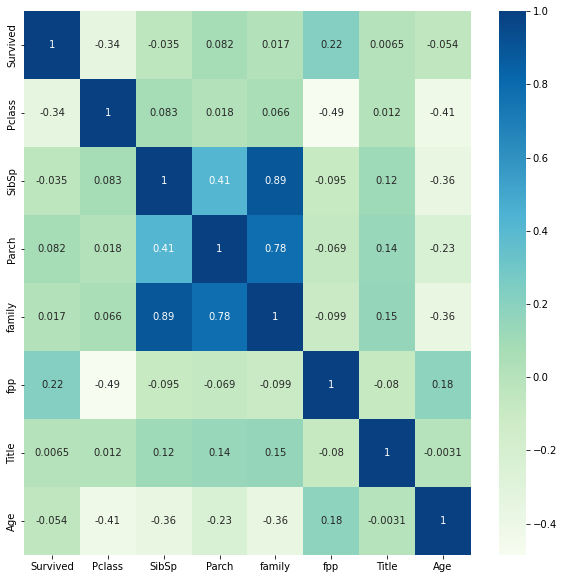

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cmap = "GnBu", annot = True)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

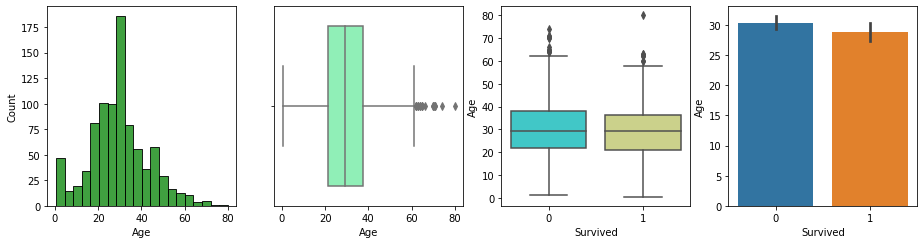

In [25]:
# Different sorts of plots to represent survival column with the age and fpp column 
# I am representing them separately as they are continuous features
plt.figure(figsize = (40,40))
plt.subplots_adjust(hspace=0.1)
plt.subplot(10,10,1)
sns.histplot(data.Age,bins=20,color="Green",label = "Age")
plt.subplot(10,10,2)
sns.boxplot(x='Age',data=data,palette='rainbow')
plt.subplot(10,10,3)
sns.boxplot(x='Survived',y='Age',data=data,palette='rainbow')
plt.subplot(10,10,4)
sns.barplot(x='Survived',y='Age',data=data)

<AxesSubplot:xlabel='Survived', ylabel='fpp'>

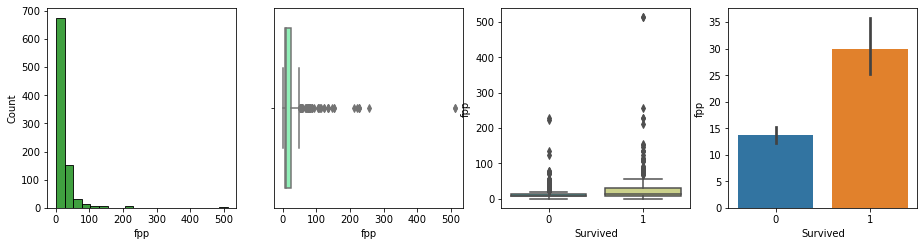

In [26]:
plt.figure(figsize = (40,40))
plt.subplots_adjust(hspace=0.1)
plt.subplot(10,10,1)
sns.histplot(data.fpp,bins=20,color="Green",label = "fpp")
plt.subplot(10,10,2)
sns.boxplot(x='fpp',data=data,palette='rainbow')
plt.subplot(10,10,3)
sns.boxplot(x='Survived',y='fpp',data=data,palette='rainbow')
plt.subplot(10,10,4)
sns.barplot(x='Survived',y='fpp',data=data)

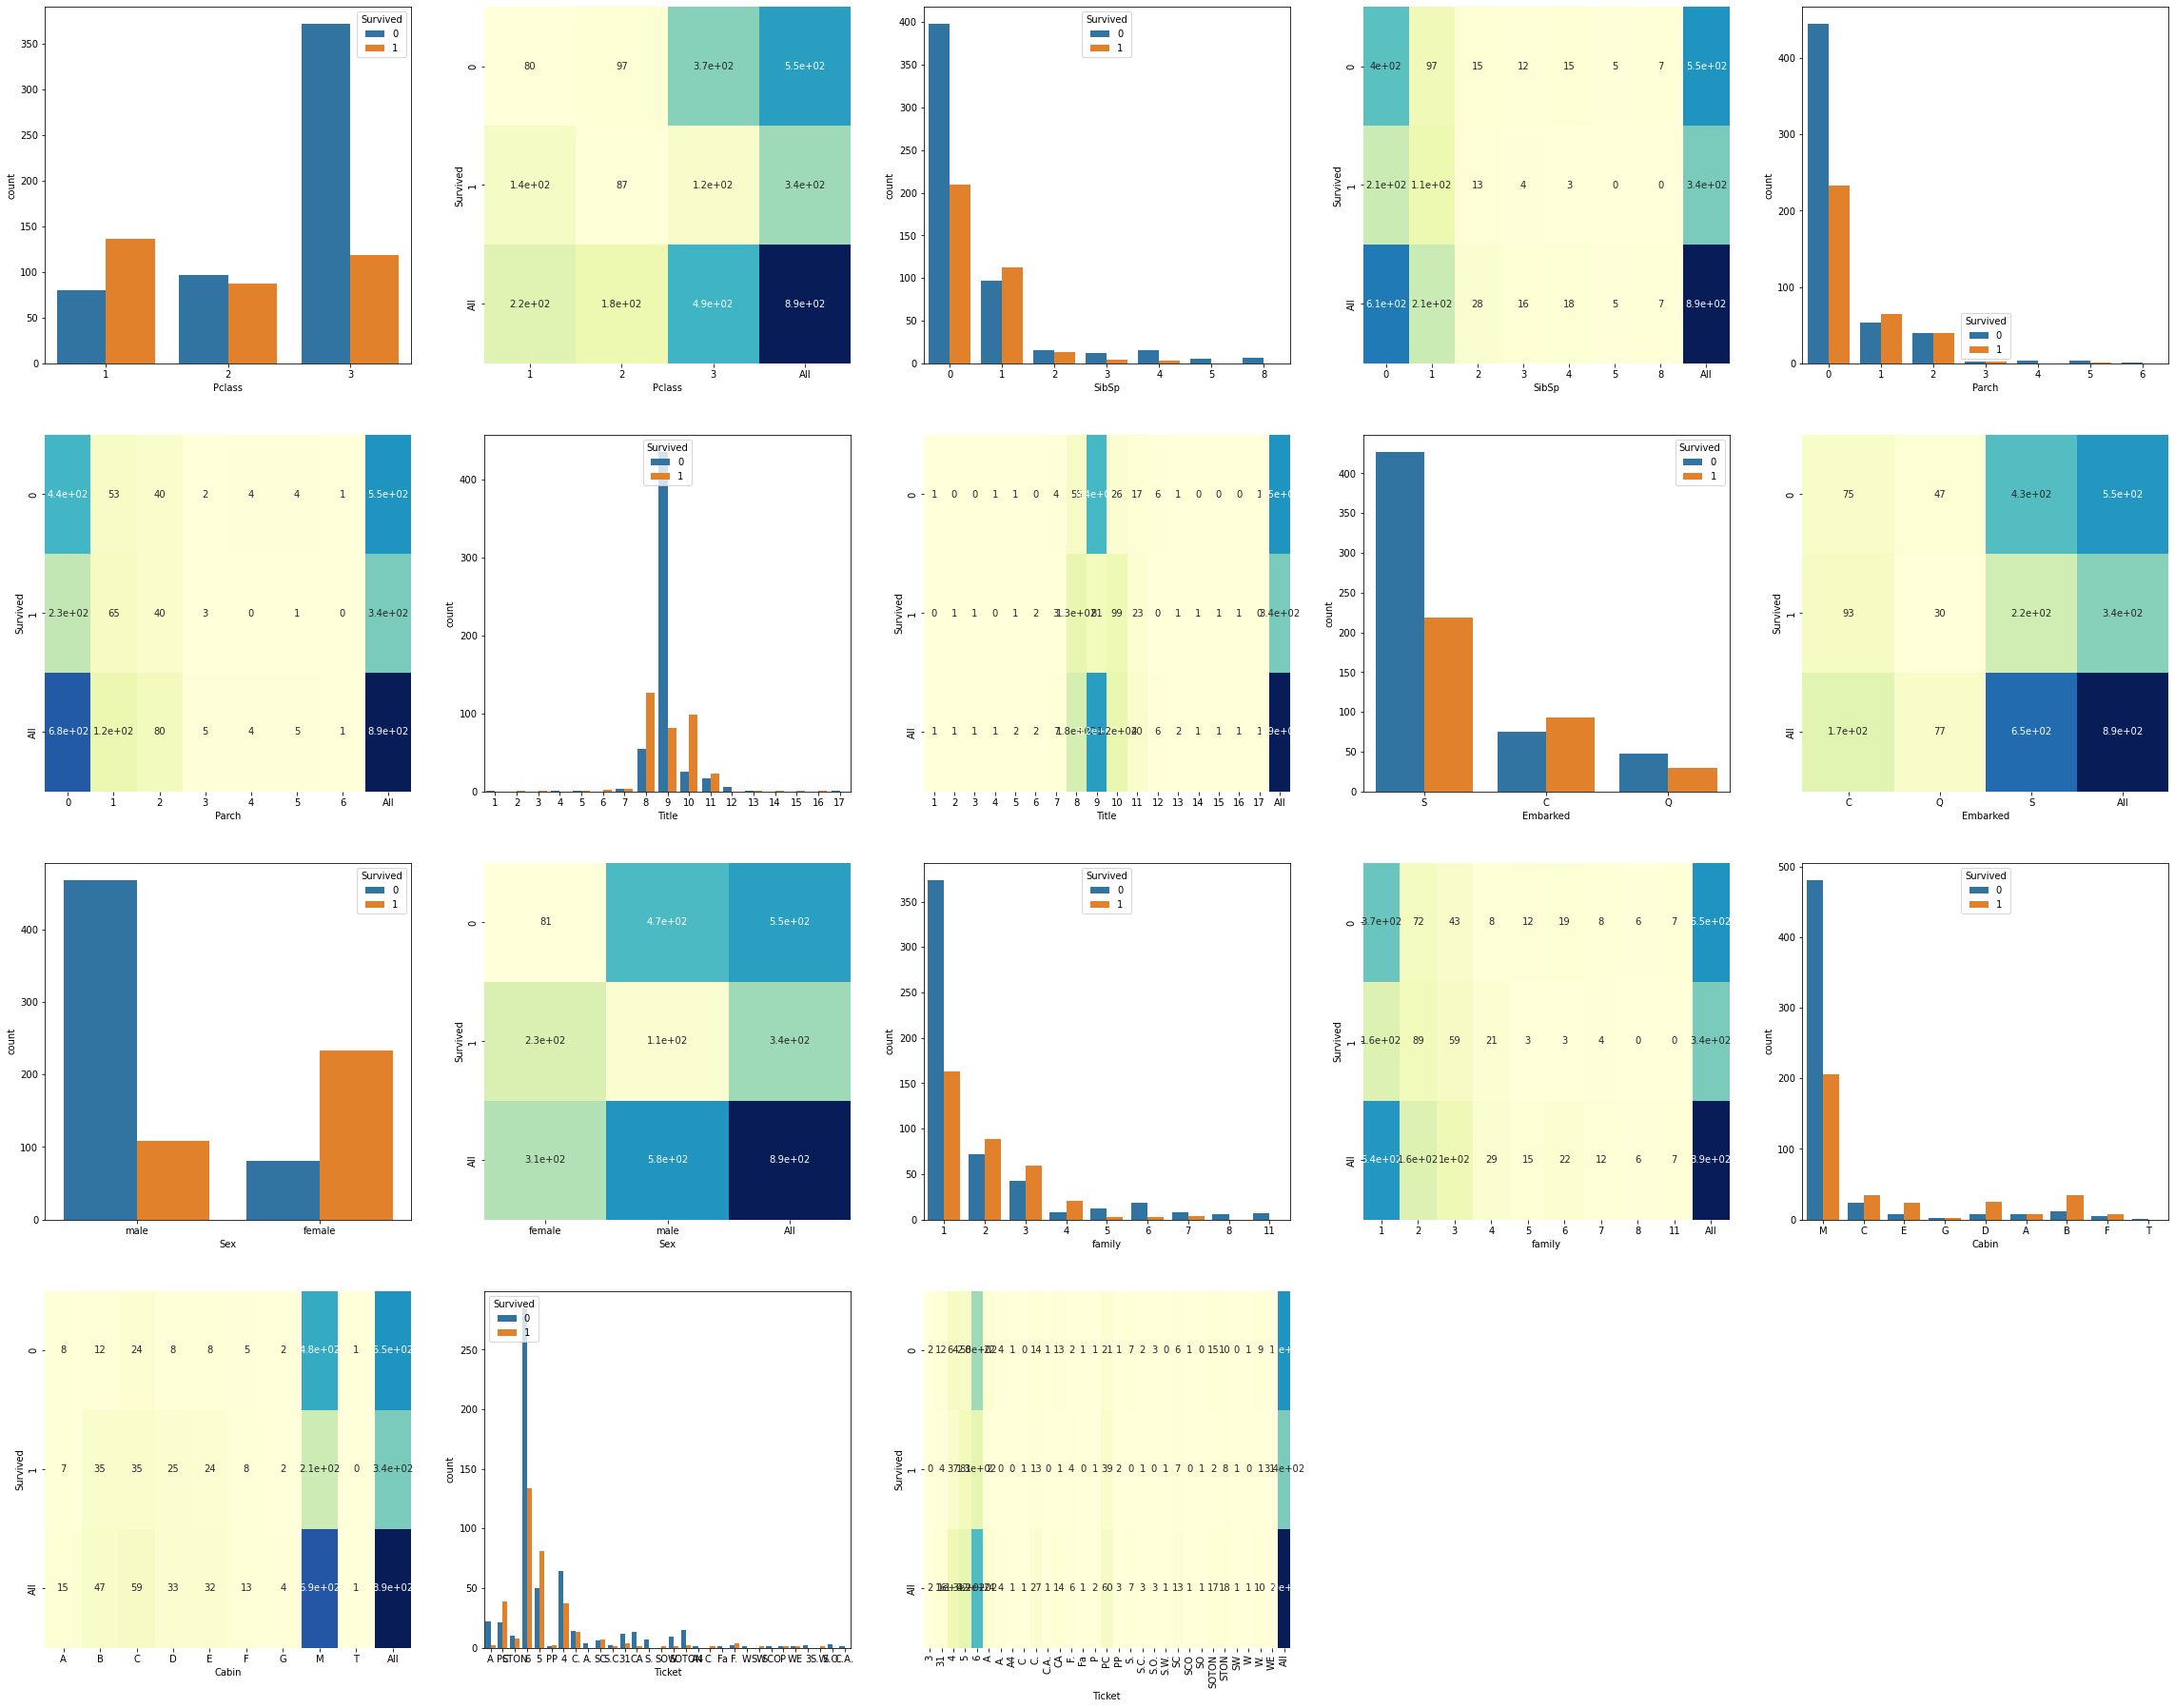

In [27]:
# Visualizing categrocial variables using countplots and crosstabs
categorical = ['Pclass','SibSp','Parch','Title','Embarked','Sex','family','Cabin','Ticket']
plt.figure(figsize=(40,40))
i = 1
for cols in categorical:
    plt.subplot(5,5,i)
    sns.countplot(data = data,x = cols,hue = 'Survived')
    plt.subplot(5,5,i+1)
    sns.heatmap(pd.crosstab(data.Survived, data[cols],margins=True),cmap="YlGnBu", annot=True, cbar=False)
    i = i+2

<font size="6">Feature Engineering</font>

In [28]:
# One Hot encoding of remaining categorical features
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['Sex'] = label.fit_transform(data['Sex'])
data['Embarked'] = label.fit_transform(data['Embarked'])
data['Ticket'] = label.fit_transform(data['Ticket'])
data['Cabin'] = label.fit_transform(data['Cabin'])

<font size="4">Skewness</font>

In [29]:
from scipy.stats import skew
skewness = {}
# This will store skewness corresponding to different columns of dataset
for col in data.columns.drop("Survived"):
    skewness[col] = skew(data[col])

In [30]:
print(skewness)

{'Pclass': -0.6294858816096934, 'Sex': -0.6178784065548295, 'SibSp': 3.6891276847759507, 'Parch': 2.7444867379203735, 'Ticket': 1.9821927815154101, 'Cabin': -1.6333419806257132, 'Embarked': -1.2626927433430535, 'family': 2.7228476726920388, 'fpp': 7.7525153713575365, 'Title': 0.23970554591938464, 'Age': 0.335920062198598}


In [31]:
# Removing skewness of columns with skewness greater than 1.5
for cols in data.columns.drop("Survived"):
    x = skewness[cols]
    while(x>1.5):
        sqrt = np.sqrt(data[cols])
        data[cols] = pd.DataFrame(sqrt)
        x = skew(data[cols])
        print(cols,x)

SibSp 1.4341069481300392
Parch 1.5272224486562416
Parch 1.289046308636572
Ticket 1.5045699616421777
Ticket 0.9269955866458407
family 1.7928606754182852
family 1.4499718199514464
fpp 2.928070956685192
fpp 0.6886285630985539


In [32]:
for col in data.columns.drop("Survived"):
    print(f"{col}:{skew(data[col])}")

Pclass:-0.6294858816096934
Sex:-0.6178784065548295
SibSp:1.4341069481300392
Parch:1.289046308636572
Ticket:0.9269955866458407
Cabin:-1.6333419806257132
Embarked:-1.2626927433430535
family:1.4499718199514464
fpp:0.6886285630985539
Title:0.23970554591938464
Age:0.335920062198598


<font size="4">Feature Selection</font>

In [33]:
# Required libraries and tests for feature engineering
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

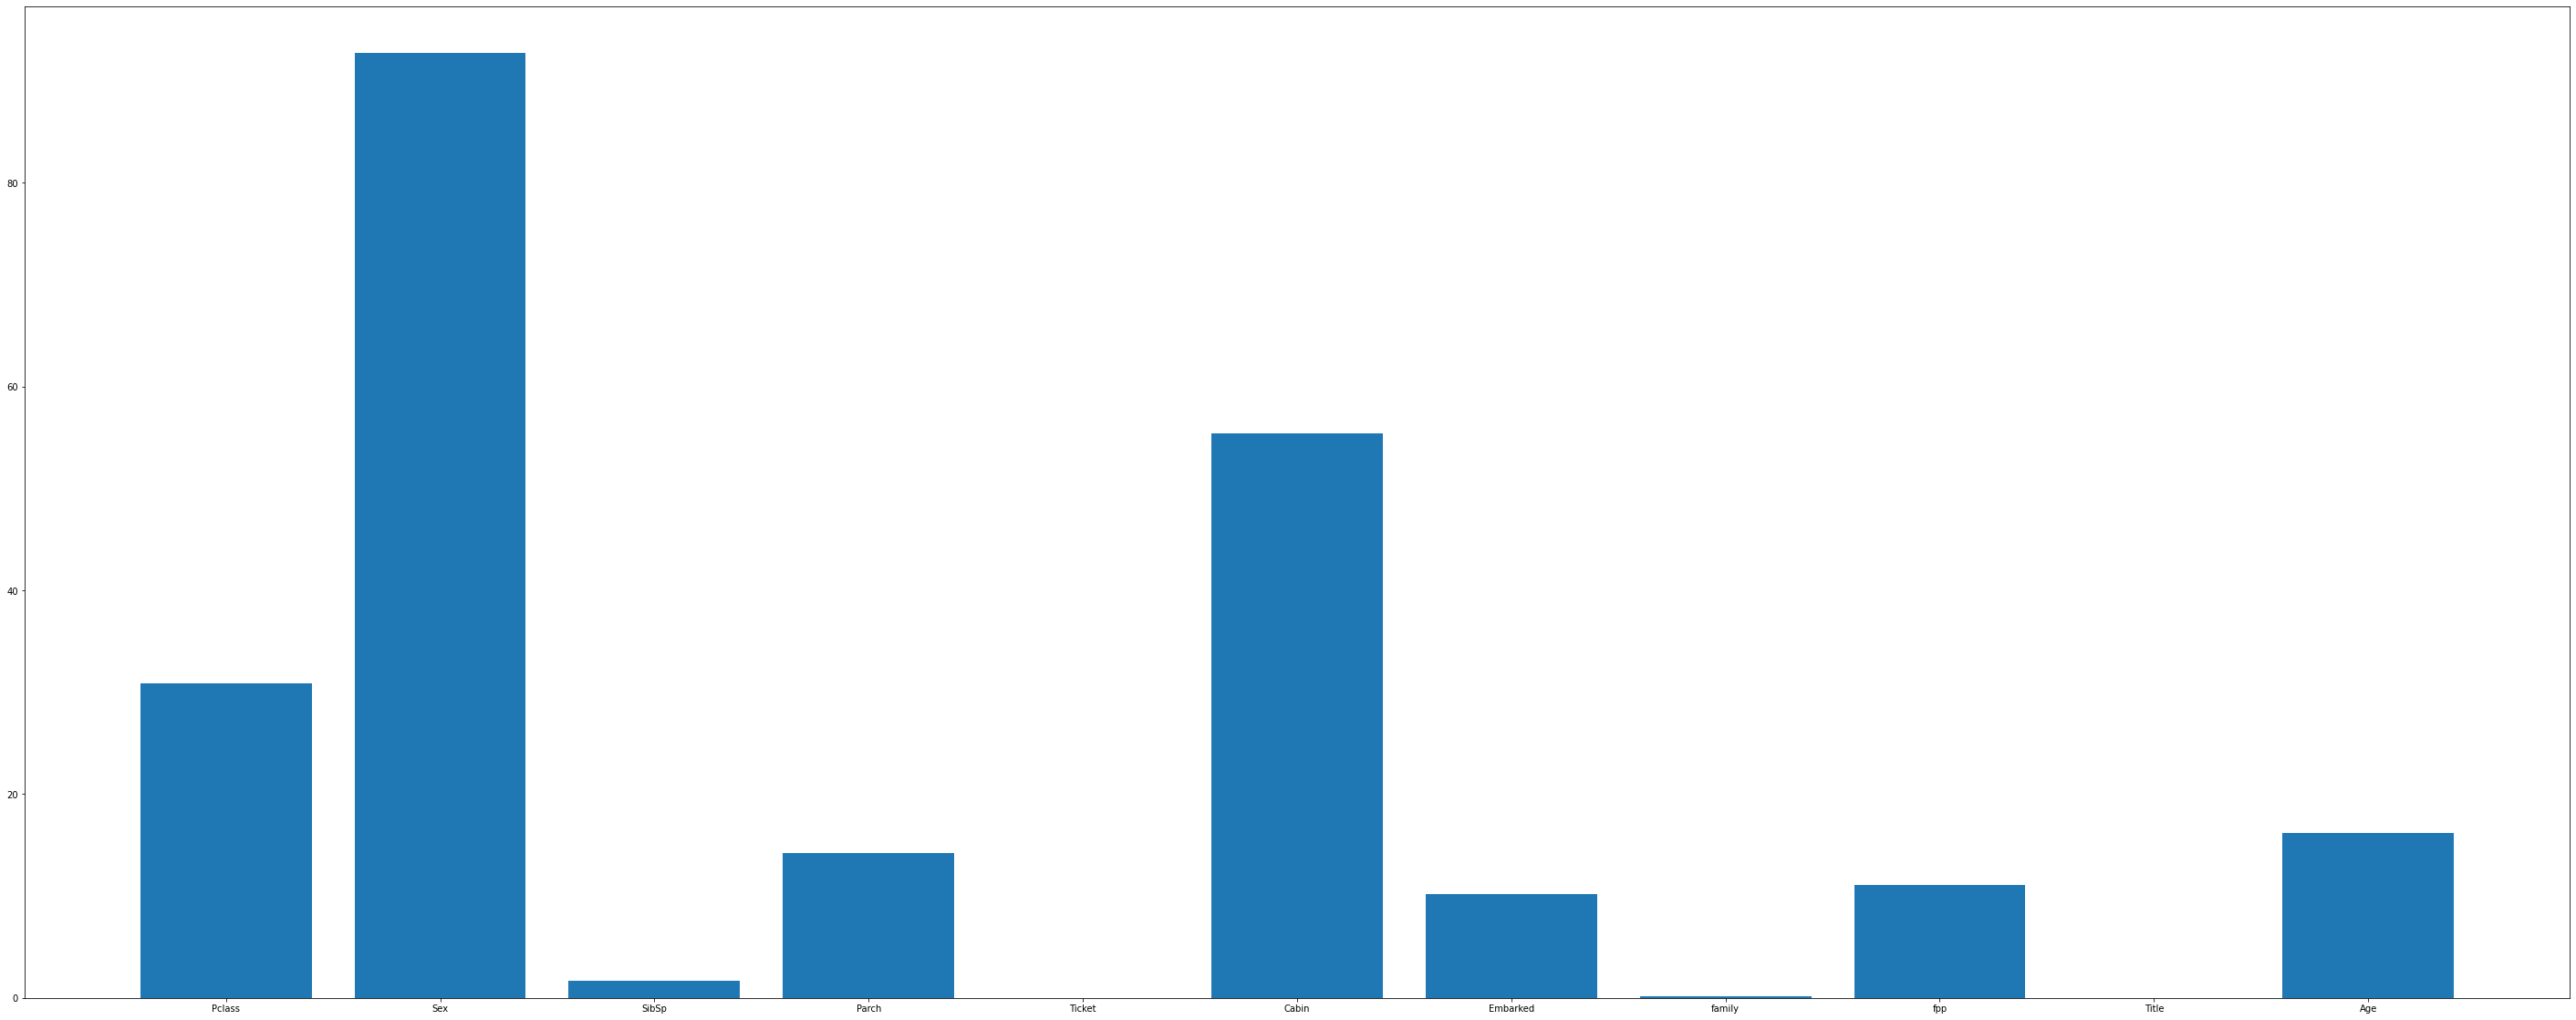

In [34]:
features = SelectKBest(score_func=chi2, k=10) 
select = features.fit(data.drop(['Survived'],axis=1), data['Survived'])  
plt.figure(figsize=(50,20))
plt.bar([i for i in data.drop(['Survived'],axis=1).columns], features.scores_)
plt.show()

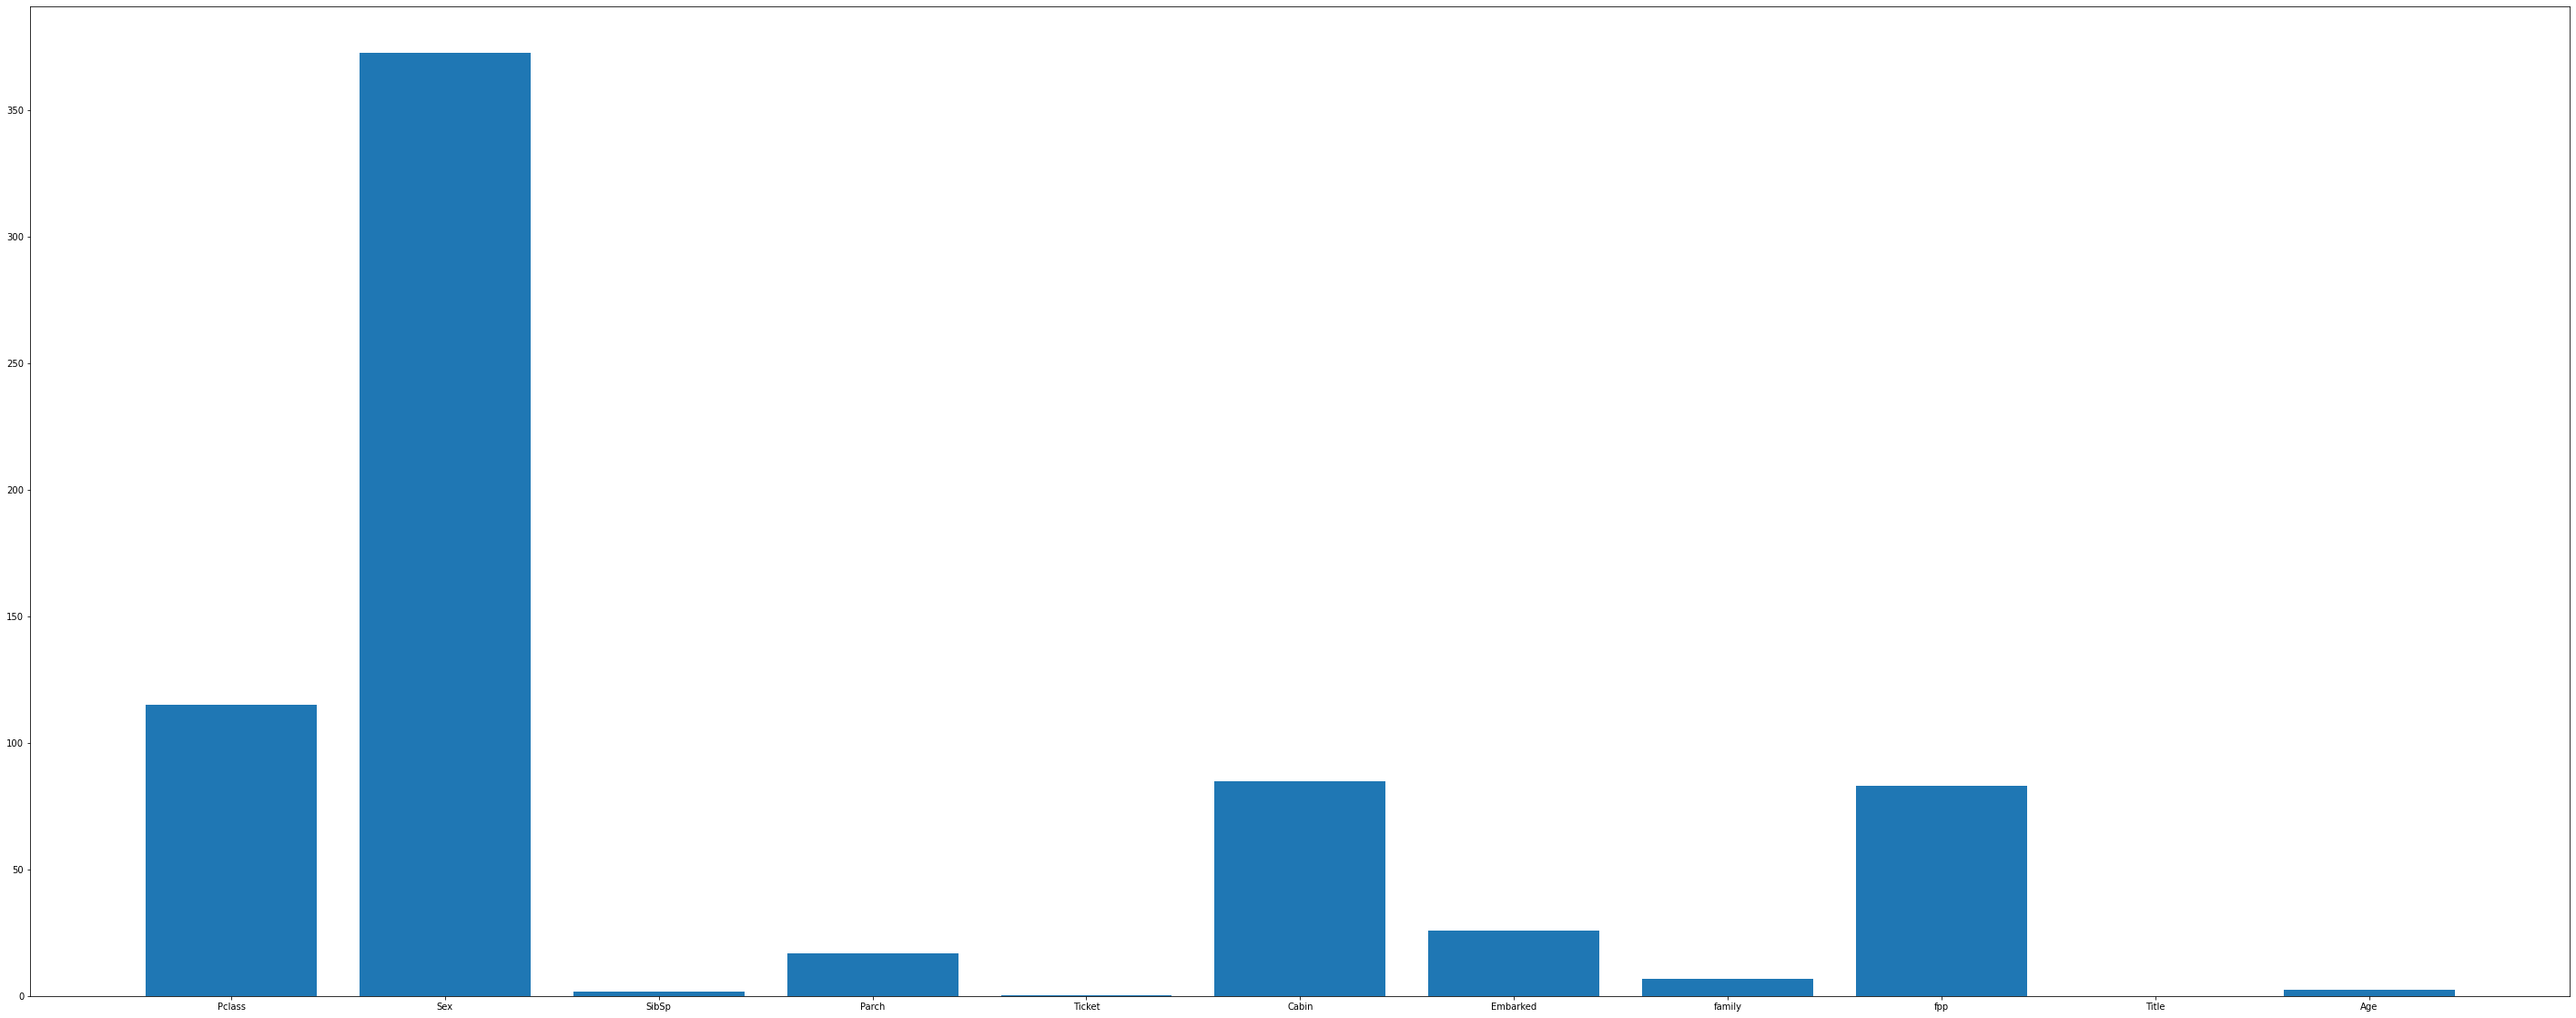

In [35]:
features = SelectKBest(score_func=f_classif, k=10) 
select = features.fit(data.drop(['Survived'],axis=1), data['Survived'])
plt.figure(figsize=(50,20))
plt.bar([i for i in data.drop(['Survived'],axis=1).columns], features.scores_)
plt.show()

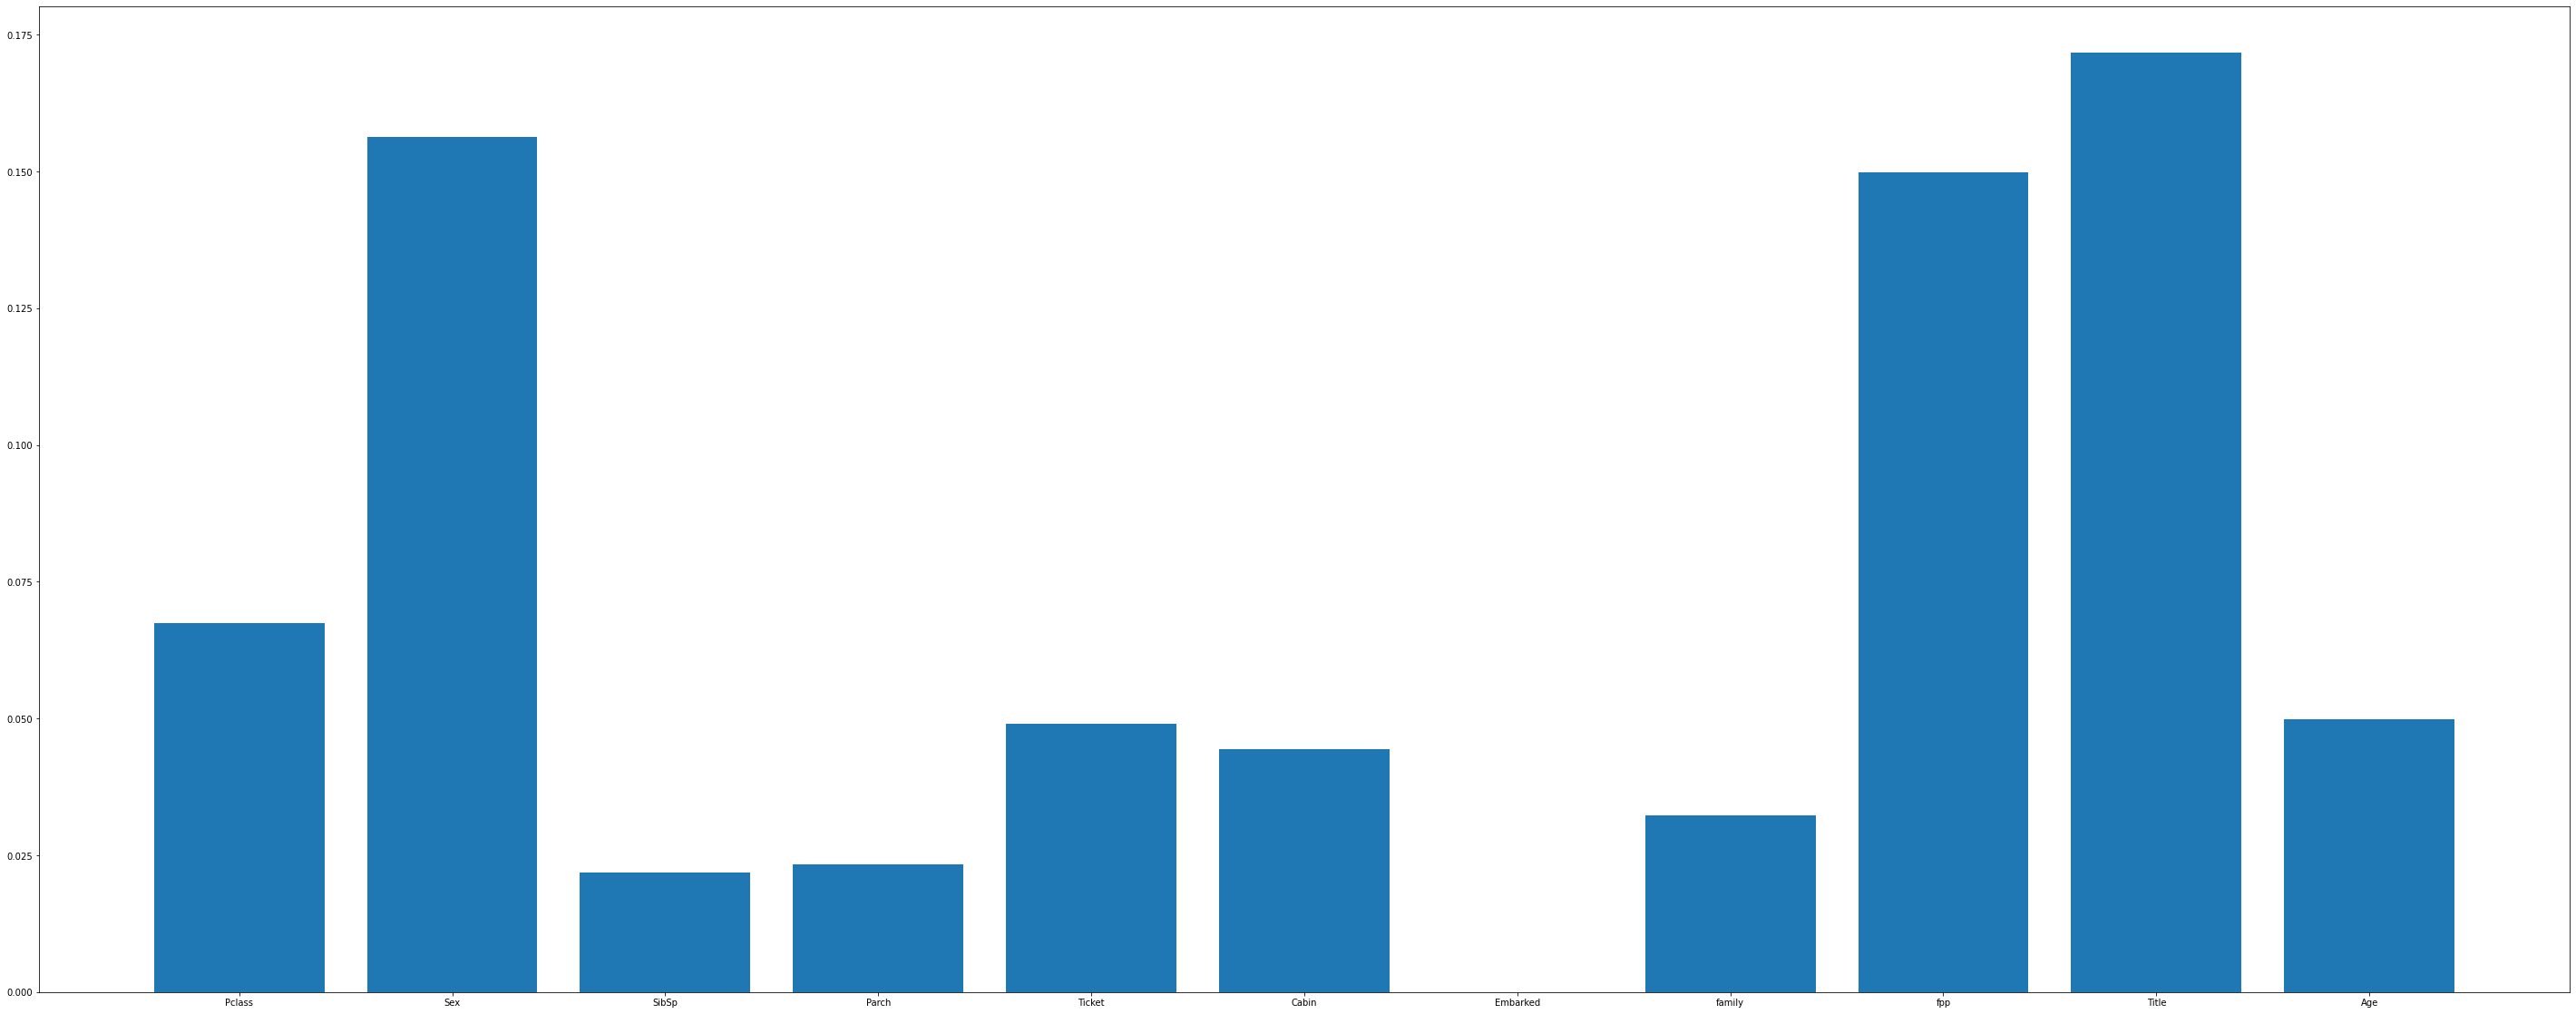

In [36]:
features = SelectKBest(score_func=mutual_info_classif, k=10) 
select = features.fit(data.drop(['Survived'],axis=1), data['Survived'])  
plt.figure(figsize=(50,20))
plt.bar([i for i in data.drop(['Survived'],axis=1).columns], features.scores_)
plt.show()

In [37]:
# In some metric or other all the features carry some information
# Since we already have less no. of features, so instead of dropping columns let's generate accuracy scores for different ml models
# Using grid search cv i will find best parameters and after that i will use forward elimination
# Using it i will find best set of features for a given ml model

<font size="6">Modelling</font>

In [38]:
# Normalizing our dataset
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
mod = data.drop(['Survived'],axis=1)
s.fit(mod)
mod = pd.DataFrame(s.transform(mod))

In [39]:
# Splitting data in test and train set
X = mod.iloc[:,:]
y = data.iloc[:,0]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

<font size="4">Model Selection and Hyperparameter Tuning </font>

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
# Different Ml models with their respective hyperparameters 
model_params = {
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto',max_iter = 10000),
        'params': {
            'penalty' : ['l2'],
            'dual' : [False,True],
            'fit_intercept' : [False,True],
            'C': [1,5,10,20]
        }
    },
    'KNN': {
        'model': neighbors.KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : range(1,100),
            'weights' : ['uniform','distance'],
            'algorithm': ['ball_tree', 'kd_tree', 'brute'],
            'p' : [1,2]            
        }
    },
    'decision trees': {
        'model' : tree.DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini','entropy'],
            'splitter' : ['best','random'],
            'max_depth' : [10,20,30,40,50,None],
            'min_samples_leaf' : [1,2,3,4],
            'min_samples_split' : [2,3,4]
        }
    },
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,5,10,20],
            'kernel': ['rbf','linear','sigmoid'],
            'decision_function_shape' : ['ovo','ovr'],
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20],
            'criterion' : ['gini','entropy'],
            'max_depth' : [10,20,30,40,50,None],
            'min_samples_leaf' : [1,2,3,4],
            'min_samples_split' : [2,3,4],
            'bootstrap' : [False,True]
        }
    }
}

In [44]:
# This block of code will help us determine which model is best for our dataset
from sklearn.model_selection import GridSearchCV
scores = []
# Grid search cv 
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,logistic_regression,0.810225,"{'C': 20, 'dual': False, 'fit_intercept': Fals..."
1,KNN,0.816491,"{'algorithm': 'ball_tree', 'n_neighbors': 14, ..."
2,decision trees,0.817725,"{'criterion': 'entropy', 'max_depth': 40, 'min..."
3,svm,0.815233,"{'C': 10, 'decision_function_shape': 'ovo', 'k..."
4,random_forest,0.841452,"{'bootstrap': True, 'criterion': 'entropy', 'm..."


In [45]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [46]:
# Random forest gives the best score among the used ml models
mp = model_params['random_forest']
clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
model = clf.fit(X_train,y_train)

In [63]:
print(model.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 20}


In [54]:
# performing forward selection on random forest model
sfs = SFS(model.best_estimator_,
          k_features = (1,11),
          forward = True,
          scoring = 'accuracy')
X_train_selected = sfs.fit_transform(X_train,y_train)
best_model = model.best_estimator_
best_model.fit(X_train_selected,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=20)

In [57]:
X_test_selected = sfs.transform(X_test)
y_predict = best_model.predict(X_test_selected)

<font size="4">Model Analysis</font>

In [59]:
# Generating different metrics on our test set
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy score on validation set :", best_model.score(X_test_selected,y_test))
print("Precision score on validation set :", precision_score(y_predict,y_test))
print("recall score on validation set :", recall_score(y_predict,y_test))
print("F1 score on validation set :", f1_score(y_predict,y_test))

Accuracy score on validation set : 0.8222222222222222
Precision score on validation set : 0.6764705882352942
recall score on validation set : 0.8214285714285714
F1 score on validation set : 0.7419354838709677


<AxesSubplot:>

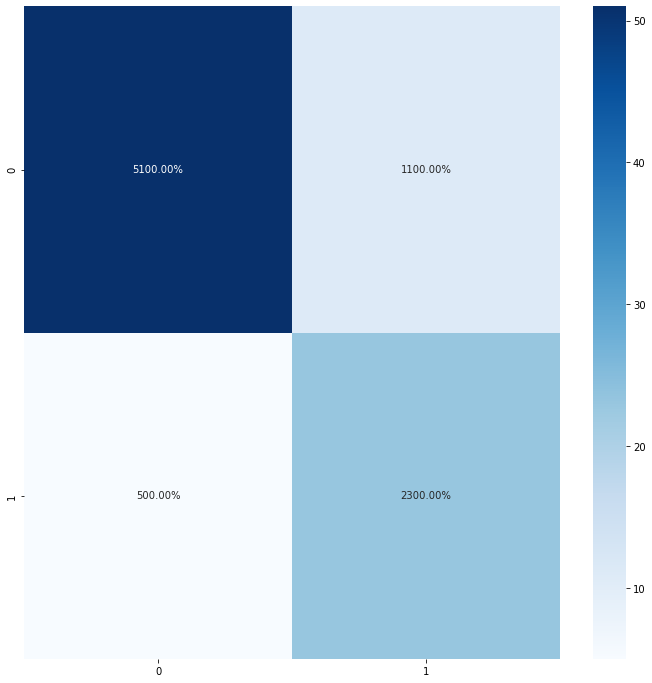

In [62]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Blues')

<font size="6">Conclusion</font>

Using simplistic EDA and different types of imputation of NaN value and using hyperparameter tuning along with forward selection we are able to generate 82-84% accuracy